(60000,)

Epoch 1: val_loss improved from inf to 0.43673, saving model to ./mmodel/mnist_fashion/01-0.4367.keras

Epoch 2: val_loss improved from 0.43673 to 0.41314, saving model to ./mmodel/mnist_fashion/02-0.4131.keras

Epoch 3: val_loss did not improve from 0.41314

Epoch 4: val_loss improved from 0.41314 to 0.39966, saving model to ./mmodel/mnist_fashion/04-0.3997.keras

Epoch 5: val_loss improved from 0.39966 to 0.37741, saving model to ./mmodel/mnist_fashion/05-0.3774.keras

Epoch 6: val_loss improved from 0.37741 to 0.37315, saving model to ./mmodel/mnist_fashion/06-0.3731.keras

Epoch 7: val_loss improved from 0.37315 to 0.35993, saving model to ./mmodel/mnist_fashion/07-0.3599.keras

Epoch 8: val_loss improved from 0.35993 to 0.35123, saving model to ./mmodel/mnist_fashion/08-0.3512.keras

Epoch 9: val_loss improved from 0.35123 to 0.34504, saving model to ./mmodel/mnist_fashion/09-0.3450.keras

Epoch 10: val_loss did not improve from 0.34504

Epoch 11: val_loss improved from 

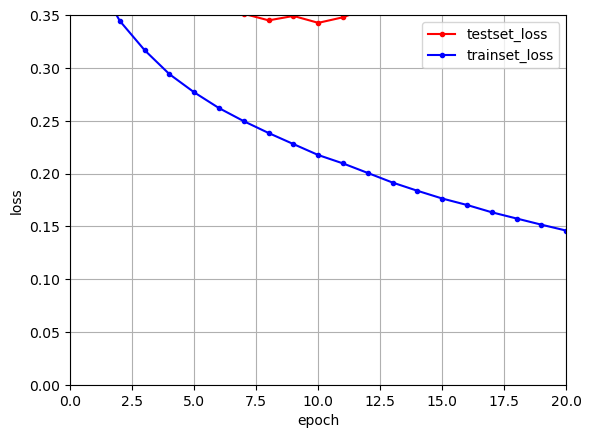

In [66]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

fashion_mnist = tf.keras.datasets.fashion_mnist

(trainImages, trainLabels), (testImages, testLabels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

trainImages = trainImages.reshape(trainImages.shape[0], 784).astype('float32')/255
testImages = testImages.reshape(testImages.shape[0], 784).astype('float32')/255

print(trainLabels.shape)
trainLabels = tf.keras.utils.to_categorical(trainLabels, 10)
testLabels = tf.keras.utils.to_categorical(testLabels, 10)

model = Sequential()
model.add(Input(shape=(784, )))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
MODEL_DIR = './model/mnist_fashion/'

if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath = './mmodel/mnist_fashion/{epoch:02d}-{val_loss:.4f}.keras'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor = 'val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience=10)

history = model.fit(trainImages, trainLabels, validation_data = (testImages,testLabels), epochs=30, batch_size=200, verbose = 0, callbacks=[early_stopping_callback, checkpointer])

print("test accuracy: {}".format(model.evaluate(testImages, testLabels)[1]))

y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='trainset_loss')
plt.legend(loc='upper right')
plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

강사님 코드
-

In [49]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [50]:
print(train_images.shape)
print(train_labels)
print(test_images.shape)
print(len(test_labels))

(60000, 28, 28)
[9 0 0 ... 3 0 5]
(10000, 28, 28)
10000


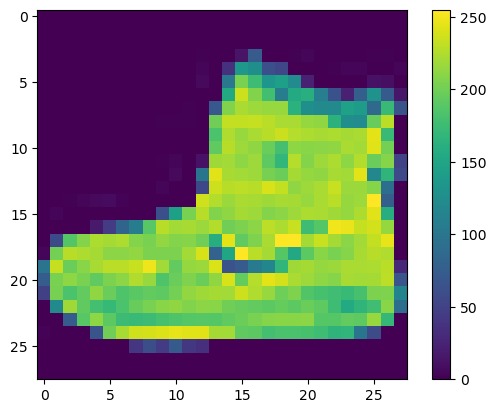

In [51]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

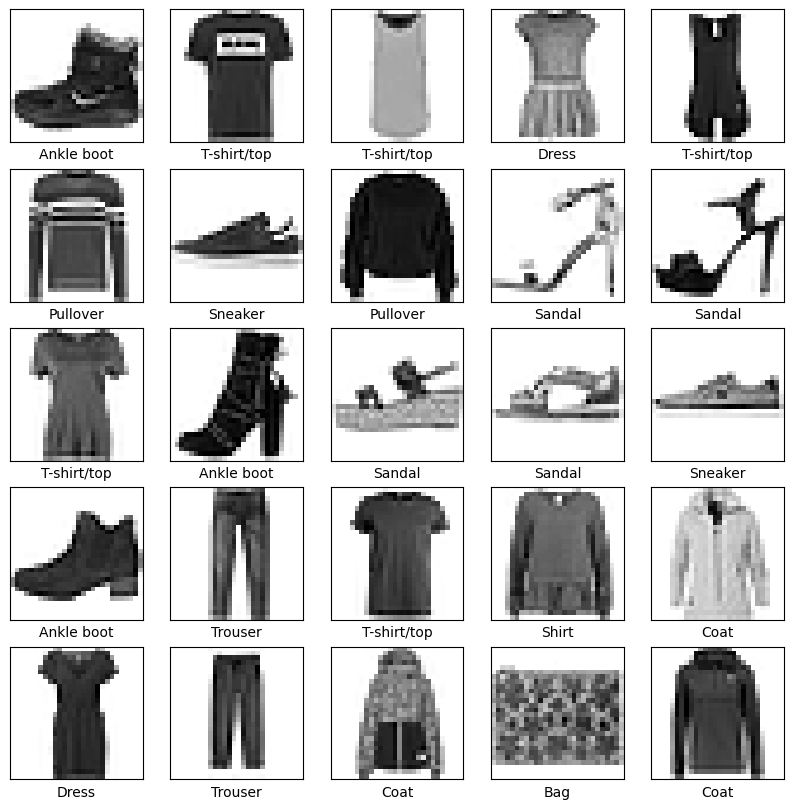

In [52]:
train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3)
model_checkpoint = ModelCheckpoint(filepath='best_model_fcnn.keras', monitor='val_loss', save_best_only=True)
history = model.fit(train_images, train_labels, epochs=50, validation_split=0.2, callbacks=[early_stopping, model_checkpoint])

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\n테스트 정확도:', test_acc)

predictions=model.predict(test_images)
print(predictions[0])
print(np.argmax(predictions[0]))
print(test_labels[0])

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7661 - loss: 0.6591 - val_accuracy: 0.8504 - val_loss: 0.4322
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8577 - loss: 0.4017 - val_accuracy: 0.8703 - val_loss: 0.3696
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8729 - loss: 0.3549 - val_accuracy: 0.8758 - val_loss: 0.3502
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8817 - loss: 0.3253 - val_accuracy: 0.8796 - val_loss: 0.3390
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8888 - loss: 0.3041 - val_accuracy: 0.8828 - val_loss: 0.3275
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8957 - loss: 0.2862 - val_accuracy: 0.8825 - val_loss: 0.3292
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9015 - loss: 0.2694 - val_accuracy: 0.8852 - val_loss: 0.3248
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9061 - loss: 0.2558 -

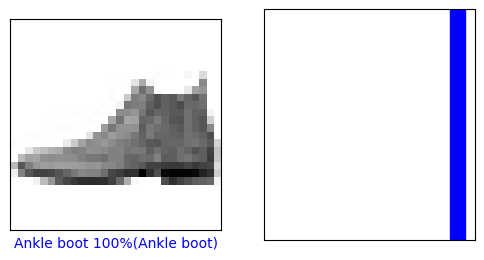

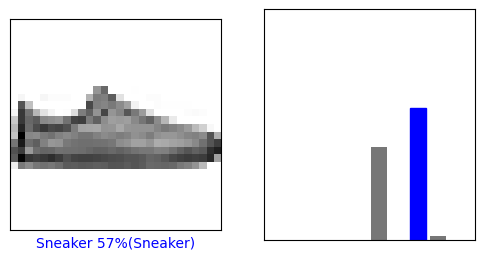

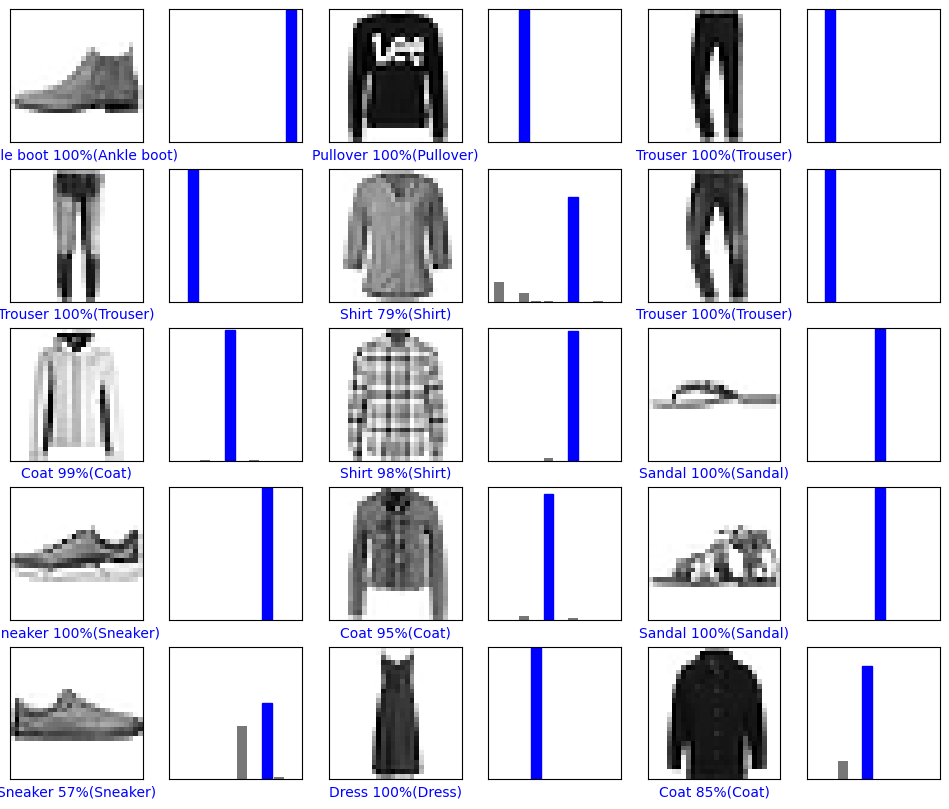

(28, 28)
(1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[[4.3862533e-10 1.3380296e-11 5.8421584e-10 2.2735930e-10 5.7970784e-11
  2.3574008e-05 3.5657595e-07 2.7292504e-03 2.7792759e-09 9.9724686e-01]]


9

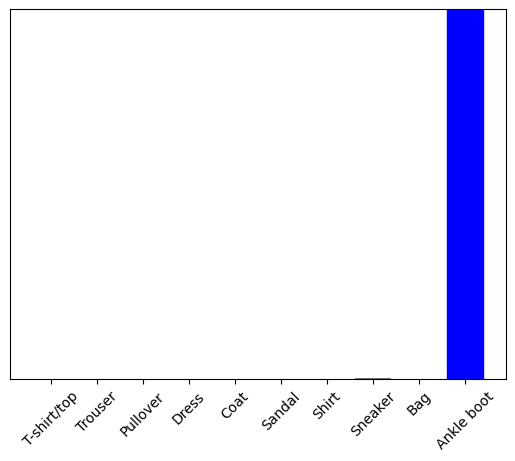

In [85]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img=predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}%({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array), 
                                        class_names[true_label]),
                                        color = color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()

i = 12
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

img=test_images[0]
print(img.shape)

img=(np.expand_dims(img, 0))
print(img.shape)
predictions_single=model.predict(img)
print(predictions_single)

plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
np.argmax(predictions_single[0])

이미지 개수:  3
이미지 이름 :  1 2 3


0


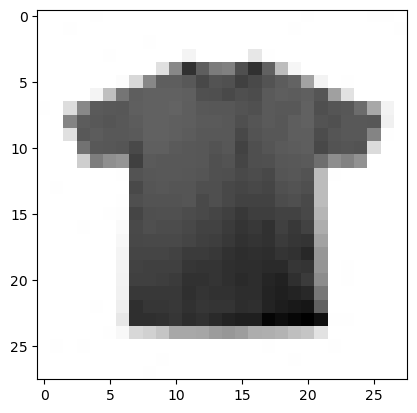

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Shirt
1


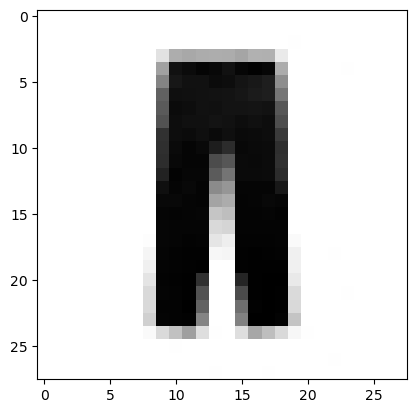

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Trouser
2


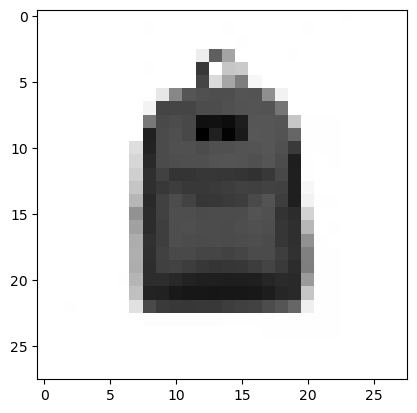

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Bag


In [99]:
import tensorflow as tf
import sys
import os
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import cv2
model = load_model('best_model_fcnn.keras')
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
n = int(input('이미지 개수: '))
test_num = [None] * n
jpg_list = input('이미지 이름 : ').split()
test_predict = list()

for i in range(n):
    print(i)
    test_num[i] = cv2.imread('./datas/mnist_fashion/' + jpg_list[i] + '.jpg')
    if test_num[i] is None:
        print(f"Error: Image '{jpg_list[i]}.jpg' not found.")
        continue
    test_num[i] = cv2.cvtColor(test_num[i], cv2.COLOR_BGR2GRAY)
    test_num[i] = 255-test_num[i]
    plt.imshow(test_num[i], cmap = 'Greys')
    plt.show()

    test_num[i] = test_num[i]/255
    test_num[i] = np.expand_dims(test_num[i], 0)
    prediction = model.predict(test_num[i])
    print(class_names[prediction.argmax()])